# Pandas Part 2

## Combining and Merging Datasets
### Joining DataFrame

In [ ]:
from IPython.display import Image
Image(filename='pandas2_intro.png') 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d1 = pd.DataFrame({
    'key' : ['a','b','c','c','d','e'],
    'num1' : range(6)
})

d2 = pd.DataFrame({
    'key' : ['b','c','e','f'],
    'num2' : range(4)
})

print(d1)
print(d2)

In [ ]:
# pandas merge d1 d2 with key
pd.merge(d1,d2,on='key')

In [ ]:
# pandas merge d1 d2 without key
# without 'on' khi tên của 2 cột chung là duy nhất và giống nhau
pd.merge(d1,d2)

In [ ]:
d3 = pd.DataFrame({
    'key1' : ['a','b','c','c','d','e'],
    'num1' : range(6)
})
d4 = pd.DataFrame({
    'key2' : ['b','c','e','f'],
    'num1' : range(4)
})

# đã ko còn trùng cột key như d1,d2

In [ ]:
# pandas merge with left on, right on
pd.merge(d3,d4,left_on='key1',right_on='key2')

In [ ]:
# full outer join d1, d2
pd.merge(d1,d2,on='key', how='outer')

In [ ]:
# left join
pd.merge(d1,d2,on='key', how='left')

In [ ]:
# right join
pd.merge(d1,d2,on='key', how='right')

In [ ]:
df1  =pd.DataFrame({
    'key' : ['a','b','c','c','d','e'],
    'num1' : range(6),
    'count' : ['one','three','two','one','one','two']
})

df2 = pd.DataFrame({
    'key' : ['b','c','e','f'],
    'num1' : range(4),
    'count' : ['one','two','two','two']
})
print(df1)
print(df2)

In [ ]:
# full outer key: key, count (trên 2 primary key)
print(pd.merge(df1,df2,left_on=['key','count'],right_on = ['key','count']))

# full outer trên 1 primary key
pd.merge(df1,df2, on='key',how='outer')

In [ ]:
# join with suffixes (hậu tố cho cái tên column, chứ ko liên quan tới data bên trong)
pd.merge(df1,df2,
         on = 'key',
         suffixes = ('_data1', '_data2'))

## Merging on index

In [ ]:
df1  =pd.DataFrame({
    'letter' : ['a','a','b','b','a','c'],
    'num' : range(6)
})

df2 = pd.DataFrame({
    "value" : [3,5,7]},
    index = ['a','b','c']
)
print(df1)
print(df2)

In [ ]:
# right_index
pd.merge(df1,df2,
         left_on='letter',
         right_index = True)

In [ ]:
right = pd.DataFrame(
    [[1,2],[3,4],[5,6]],
    index = ['a','c','d'],
    columns = ['Tom','Tim']
)

left = pd.DataFrame(
    [[7,8],[9,10],[11,12],[13,14]],
     index = ['a','b','e','f'],
     columns = ['Sam','Kim']
)
print(left)
print(right)

In [ ]:
# merge with full index (ý là 2 bên merge bằng index)
pd.merge(left, right,
         left_index = True,
         right_index = True)

In [ ]:
left.join(right)

In [ ]:
left.join(right,how='outer')

# giống với full outer join bên dưới

In [ ]:
#(full outer join)
pd.merge(left, right,
         left_index = True,
         right_index = True,
         how = 'outer')    

In [ ]:
data = pd.DataFrame(
    [[1,3],[5,7],[9,11]],
    index = ['a','b','f'],
    columns = ['Alex','Keta']
)

In [ ]:
# join multiple df without common key
left.join([right,data])

## Concateing along Axis

In [134]:
seq = np.arange(20).reshape(4,5)
seq

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [135]:
# numpy concatenate seq seq col
np.concatenate([seq,seq],axis=1)

array([[ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19, 15, 16, 17, 18, 19]])

In [ ]:
# numpy concatenate seq seq row
np.concatenate([seq,seq],axis=0)

In [ ]:
data1 = pd.Series([0,1], index = ['a','b'])
data2 = pd.Series([2,3,4], index = ['c','d','e'])
data3 = pd.Series([5,6], index = ['f','g'])

print(data1)
print(data2)
print(data3)

In [137]:
# pandas concat data 1 2 3
pd.concat([data1,data2,data3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [138]:
# pandas concat data 1 2 3 col
pd.concat([data1,data2,data3],axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
data4 = pd.Series([10,11,12], index = ['a','b','c'])

pd.concat([data1,data4],axis=1,join='outer')

In [ ]:
x = pd.concat(
    [data1, data2, data4],
    keys = ['one','two','three']
)
x

In [ ]:
x = pd.concat(
    [data1, data2, data4],
    keys = ['one','two','three'],
    axis = 1
)
x

In [ ]:
df1 = pd.DataFrame(
    np.arange(6).reshape(3,2),
    index = ['a','b','c'],
    columns = ['one','two']
)
df2 = pd.DataFrame(
    np.arange(4).reshape(2,2),
    index = ['a','c'],
    columns = ['three','four']
)
print(df1)
print(df2)

In [141]:
pd.concat(
    [df1,df2],
    axis = 1,
    keys = ['s1','s2'],
    sort = False
)

s1        s2     
  one two three four
a   0   1   0.0  1.0
b   2   3   NaN  NaN
c   4   5   2.0  3.0

## Reshaping and Pivoting

In [ ]:
s1 = pd.Series(
    np.arange(4), index = list("abcd"))
s2 = pd.Series(
    np.arange(6,9), index = list("cde"))

print(s1)
print(s2)

In [143]:
data2 = pd.concat(
    [s1,s2],
    keys = ["bir","iki"]
)
data2

#nested

bir  a    0
     b    1
     c    2
     d    3
iki  c    6
     d    7
     e    8
dtype: int32

In [144]:
# unstack
data2.unstack()

,a,b,c,d,e
bir,0.0,1.0,2.0,3.0,NaN
iki,NaN,NaN,6.0,7.0,8.0


In [145]:
data2.unstack().stack()

bir  a    0.0
     b    1.0
     c    2.0
     d    3.0
iki  c    6.0
     d    7.0
     e    8.0
dtype: float64

In [146]:
data2.unstack().stack(dropna = True)

bir  a    0.0
     b    1.0
     c    2.0
     d    3.0
iki  c    6.0
     d    7.0
     e    8.0
dtype: float64

In [ ]:
data2.unstack().stack(dropna = False)

## Pivot "Long" to "Wide Format

In [ ]:
stock = pd.DataFrame({
    'fruit': ['apple','plum','grape'] * 2,
    'color' : ['purple','yellow'] * 3,
    'piece' : [3,4,5,6,1,2]
})
stock

In [ ]:
stock.sort_values(by = ['fruit','color'])

In [ ]:
# pivot to weide table
stock.pivot(index = 'fruit', columns = 'color', values = 'piece')

In [ ]:
stock['value'] = np.random.randn(len(stock))
stock

In [ ]:
p = stock.pivot(index = 'fruit',columns = 'color',values = ['piece','value'])
p

In [ ]:
p['value']

## Pivot "Wide" to "Long" Format

In [149]:
data = pd.DataFrame({
    'lesson' : ['math','stat','bio'],
    'Sam' : [50,60,70],
    'Kim' : [80,70,90],
    'Tom' : [60,70,85]
})
data

,lesson,Sam,Kim,Tom
0,math,50,80,60
1,stat,60,70,70
2,bio,70,90,85


In [150]:
# pandas melt to long table
group = pd.melt(data,['lesson'])
group

,lesson,variable,value
0,math,Sam,50
1,stat,Sam,60
2,bio,Sam,70
3,math,Kim,80
4,stat,Kim,70
5,bio,Kim,90
6,math,Tom,60
7,stat,Tom,70
8,bio,Tom,85


In [ ]:
data = group.pivot(
    index = 'lesson',
    columns = 'variable',
    values = 'value'
)
data

In [ ]:
data.reset_index()

## Group by

In [218]:
df = pd.DataFrame({
    'key1' : list('aabbab'),
    'key2' : ['one','two','three'] * 2,
    'data1' : np.random.randn(6),
    'data2' : np.random.randn(6)
})
df

,key1,key2,data1,data2
0,a,one,-0.282512,-0.266833
1,a,two,-0.248609,-0.879424
2,b,three,-0.564737,-0.293870
3,b,one,-1.170940,-1.999769
4,a,two,-1.933762,-0.969820
5,b,three,1.094597,0.069437


In [152]:
group = df['data1'].groupby(df['key1'])
group

In [ ]:
print(group.mean())
print(group.count())
print(group.max())
print(group.min())

In [154]:
ave = df['data1'].groupby([df['key1'], df['key2']]).mean()
ave

key1  key2 
a     one     -2.281599
      two      1.526482
b     one     -0.903038
      three   -0.521493
Name: data1, dtype: float64

In [155]:
ave.unstack()

key2,one,three,two
key1,,,
a,-2.281599,NaN,1.526482
b,-0.903038,-0.521493,NaN


In [156]:
df['data1'].groupby(df["key1"]).mean()

key1
a    0.257122
b   -0.648675
Name: data1, dtype: float64

## Select a column or a subset of columns

In [219]:
df

,key1,key2,data1,data2
0,a,one,-0.282512,-0.266833
1,a,two,-0.248609,-0.879424
2,b,three,-0.564737,-0.293870
3,b,one,-1.170940,-1.999769
4,a,two,-1.933762,-0.969820
5,b,three,1.094597,0.069437


In [220]:
# mean of data 1 by key1
df.groupby('key1')['data1'].mean()

key1
a   -0.821628
b   -0.213693
Name: data1, dtype: float64

In [221]:
# mean of data1 by key1, key2
df.groupby(['key1','key2'])['data1'].mean()

key1  key2 
a     one     -0.282512
      two     -1.091185
b     one     -1.170940
      three    0.264930
Name: data1, dtype: float64

In [ ]:
# mean of data1, data2 by key1
df.groupby('key1')[['data1','data2']].mean()

In [ ]:
# mean of data1, data2 by key1, key2
df.groupby(['key1','key2'])[['data1','data2']].mean()

In [ ]:
df.groupby(['key1','key2'])[['data1','data2']].mean().unstack()

## Grouping by Index Levels

In [160]:
data = pd.DataFrame(
    np.random.randn(4,5),
    columns = [list("AAABB"),[1,2,3,1,2]]
)

In [161]:
data.columns.names = ['letter','number']
data

letter         A                             B          
number         1         2         3         1         2
0       0.533683  0.615338 -1.708170 -1.387920 -1.169310
1       0.812617 -0.107062  2.277406 -1.447928 -0.282114
2       2.290889 -1.974606 -0.371216  0.232469 -0.508600
3      -1.538991  0.810725  0.166565  0.954000  0.496148

In [162]:
data.groupby(level = 'letter',axis = 1).sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14380\3016972824.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level = 'letter',axis = 1).sum()


letter,A,B
0,-0.559149,-2.557230
1,2.982960,-1.730042
2,-0.054933,-0.276131
3,-0.561702,1.450148


## Application with Real Dataset

In [163]:
game = pd.read_csv("vgsales.csv")

In [ ]:
game.info()

In [ ]:
# print top 5
game.head()

In [ ]:
game['Name'].describe()

In [ ]:
# describe data
game.describe()

In [ ]:
# average Global_Sales
game['Global_Sales'].mean()

In [164]:
# total Global Sales of each genre
global_sales_groupby = game['Global_Sales'].groupby(game['Genre'])

In [165]:
print(global_sales_groupby.mean().sort_values(ascending = False))

Genre
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: Global_Sales, dtype: float64


In [ ]:
print(global_sales_groupby.median().sort_values(ascending = False))

In [ ]:
print(global_sales_groupby.sum().sort_values(ascending = False))

In [ ]:
global_sales_groupby.sum().sort_values(ascending = True).plot(kind = 'barh')

In [166]:
g = game[[
    'NA_Sales',
    'EU_Sales',
    'JP_Sales']].groupby(game['Genre'])

<Axes: xlabel='Genre'>

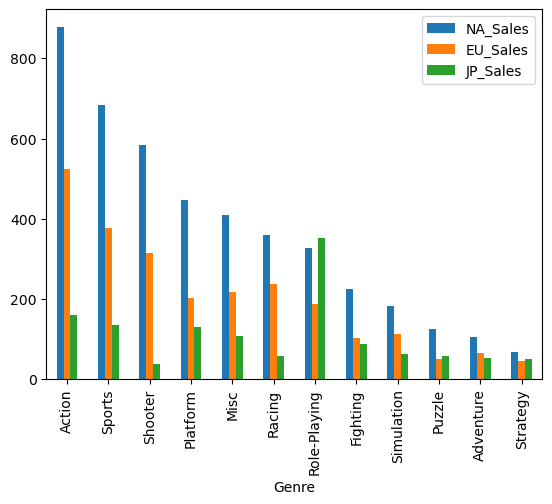

In [167]:
g.sum().sort_values(by=['NA_Sales','EU_Sales','JP_Sales'],ascending = False).plot(kind = 'bar')

## Exercise

In [168]:
'''
    Tạo bảng mean_sale: ghi nhận doanh thu trung bình của 4 thị trường NA, EU, JP, Other theo từng tựa game
'''
mean_sale = game[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(game['Name']).mean().sort_values(by=['NA_Sales'], ascending = False)

In [169]:
game.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [170]:
game['Name'].describe()

count                           16598
unique                          11493
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

In [171]:
'''
    Tạo bảng publish_year: ghi nhận năm phát hàng của từng tựa game
'''
publish_year = game['Year'].groupby(game['Name']).min()
#publish_year.min().isnull().sum()

In [172]:
'''
    Merge bảng mean_sale và publish_year, key là tựa game
'''
pd.merge(
    mean_sale, publish_year,
    left_on = 'Name',
    right_on = 'Name'
)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
Name,,,,,
Wii Sports,41.49,29.02,3.77,8.460,2006.0
Duck Hunt,26.93,0.63,0.28,0.470,1984.0
Super Mario Bros.,16.24,2.44,3.48,0.495,1985.0
Mario Kart Wii,15.85,12.88,3.79,3.310,2008.0
Wii Sports Resort,15.75,11.01,3.28,2.960,2009.0
...,...,...,...,...,...
Pachitte Chonmage Tatsujin 10: Pachinko Fuyu no Sonata,0.00,0.00,0.09,0.000,2007.0
Pachinko Wars II,0.00,0.00,0.05,0.000,1993.0
Pachinko Kaou: Misora Hibari,0.00,0.00,0.02,0.000,2007.0


In [ ]:
'''
    Tạo bảng sale gồm các cột Name, NA_Sales, EU_Sales, JP_Sales, Other_Sales
    Chuyển bảng sale từ dạng wide về dạng long table
'''
games = game[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
games

In [ ]:
pd.melt(games,'Name')

## Pivot table

In [174]:
df = pd.DataFrame({
    'class' : list('ABC')*4,
    'lesson' : ['math','stat']*6,
    'sex' : list('MFMM')*3,
    'sibling' : [1,2,3]*4,
    'score' : np.arange(40,100,5)
})
df

,class,lesson,sex,sibling,score
0,A,math,M,1,40
1,B,stat,F,2,45
2,C,math,M,3,50
3,A,stat,M,1,55
4,B,math,M,2,60
5,C,stat,F,3,65
6,A,math,M,1,70
7,B,stat,M,2,75
8,C,math,M,3,80
9,A,stat,F,1,85


In [ ]:
df.groupby('lesson')['score'].mean()

In [ ]:
df.groupby(['lesson','class'])['score'].aggregate('mean').unstack()

### - Pivot

In [ ]:
df.pivot_table(
    index = ['class','lesson'],   # hàng - row
    columns = 'sex',              # cột - columns
    values = ['sibling','score']  # giá trị điền vào - values
)

In [ ]:
df.pivot_table(
    ['sibling','score'],
    index = ['class','lesson'],
    columns = 'sex',
    margins = True
)

In [ ]:
df.pivot_table(
    ['sibling','score'],
    index = ['class','lesson'],
    columns = 'sex',
    fill_value = 0
)

## Cross-Tabulations: Crosstab

In [176]:
df

,class,lesson,sex,sibling,score
0,A,math,M,1,40
1,B,stat,F,2,45
2,C,math,M,3,50
3,A,stat,M,1,55
4,B,math,M,2,60
5,C,stat,F,3,65
6,A,math,M,1,70
7,B,stat,M,2,75
8,C,math,M,3,80
9,A,stat,F,1,85


In [175]:
# pandas crosstab df sibling and lesson
pd.crosstab([df.sibling,df.lesson], df.sex)

sex             F  M
sibling lesson      
1       math    0  2
        stat    1  1
2       math    0  2
        stat    1  1
3       math    0  2
        stat    1  1

## [Important] Working with Text Data

In [ ]:
'hello'.upper()

### Vectorized String Functions in Pandas

In [177]:
data = ['tim','Kate','SUSan',np.nan,'aLEX']

In [179]:
name = pd.Series(data)

In [180]:
name.str.capitalize()

0      Tim
1     Kate
2    Susan
3      NaN
4     Alex
dtype: object

In [181]:
name.str.lower()

0      tim
1     kate
2    susan
3      NaN
4     alex
dtype: object

In [182]:
name.str.len()

0    3.0
1    4.0
2    5.0
3    NaN
4    4.0
dtype: float64

In [185]:
name.str.startswith('a')

#hàm trả về True/False dùng làm điều kiện lọc data

0    False
1    False
2    False
3      NaN
4     True
dtype: object

In [ ]:
df = pd.DataFrame(
    np.random.randn(3,2),
    columns = ['Column A','Column B'],
    index = range(3)
)
df

In [ ]:
df.columns

In [ ]:
df.columns.str.lower().str.replace(' ','_')

In [188]:
s = pd.Series(['a_b_c','c_d_d',np.nan,'f_g_h'])
s

0    a_b_c
1    c_d_d
2      NaN
3    f_g_h
dtype: object

In [189]:
s.str.split('_').str[1]

0      b
1      d
2    NaN
3      g
dtype: object

In [190]:
s.str.split('_', expand = True, n=1)

,0,1
0,a,b_c
1,c,d_d
2,NaN,NaN
3,f,g_h


In [192]:
money = pd.Series(['15','-$20','$3000'])
money

0       15
1     -$20
2    $3000
dtype: object

In [195]:
money.str.replace('-$','')

0       15
1       20
2    $3000
dtype: object

In [ ]:
money.str.replace('-$','-')

In [ ]:
film = pd.read_csv('http:/bit.ly/imdbratings')
film.head()

In [ ]:
film.title.str.upper()

In [ ]:
film.columns = film.columns.str.capitalize()

In [ ]:
film.head()

In [ ]:
film[film.Actors_list.str.contains('Brad Pitt')]

In [ ]:
film.Actors_list.str.replace('[','')

In [ ]:
film.Actors_list.str.replace('[','').str.replace(']','')

## [Important] Working with Time Series in Pandas

### *to_datetime* method

In [200]:
# convert '15/08/2019' to datetime

pd.to_datetime('15/08/2019',dayfirst=True)


Timestamp('2019-08-15 00:00:00')

In [201]:
date = ['2019-01-05','jan 6, 2019',
       '7/05/2019','2019/01/9','20190110']

In [203]:
pd.to_datetime(date, format='mixed')

DatetimeIndex(['2019-01-05', '2019-01-06', '2019-07-05', '2019-01-09',
               '2019-01-10'],
              dtype='datetime64[ns]', freq=None)

In [132]:
pd.to_datetime('03/05/2019')

Timestamp('2019-03-05 00:00:00')

In [204]:
pd.to_datetime('05/03/2019',dayfirst = True)

Timestamp('2019-03-05 00:00:00')

In [207]:
pd.to_datetime('05/03/2019',format = '%d/%m/%Y',dayfirst = True)

// ứng với //
** ứng **

#format params ở đây là để Python hiểu ngày của mình đang định dạng theo thứ tự nào

Timestamp('2019-03-05 00:00:00')

In [ ]:
pd.to_datetime('05/03/2019',format = '%d$%m$%Y')

In [209]:
date =[
    '2019-01-05',
    'jan 6, 2019',
    '7/05/2019',
    '2019/01/9',
    '20190110',
    'xyz'
] 

In [213]:
pd.to_datetime(date, format = 'mixed', errors = 'coerce')

DatetimeIndex(['2019-01-05', '2019-01-06', '2019-07-05', '2019-01-09',
               '2019-01-10', 'NaT'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(date, errors = 'coerce')

In [ ]:
t = 1 000 000 000

In [ ]:
pd.to_datetime(t, unit = 's')